# Сборный проект - 1

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## шаг. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('/datasets/games.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Вывод

В исходных данных имеем данные о том, в каком году были выпущены игры, на какой платформе, рейтинги и продажи. Видим много пропущенных значений в столбцах с рейтингами критиков и пользователей, а также отсутсвующие некоторые значения в столбце "год выпуска". 

## шаг. Подготовьте данные

In [5]:
# приведем названия столбцов в правильный вид к нижнему регистру
data= data.rename(
    columns=str.lower
)

In [6]:
data['user_score'] = data['user_score'].where(data['user_score']!='tbd', np.nan)
data['user_score'] = data['user_score'].astype('float')

In [7]:
data = data.astype({'year_of_release': int, 'user_score':float}, errors='ignore')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [9]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [10]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


<hr style="border: 1px solid #000;"> 

In [12]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Видим, что значения отсутсвуют в большинстве в оценках и рейтингах, а также имеем пропуски в году выпуска. Можем предположить, что пропуски в именах связаны с тем, что они повторяются, а может просто данные внесены неверно. Уберем эти значения, где пропущено имя, а пропущенные значения в других столбцах оставим, т.к. мы не можем их заполнить никаким значением, т.к. это индивидуальные величины. Обратимся с данной проблемой к другим людям,которые выгружали данные.

In [13]:
data = data.dropna(subset=['name'])
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Видим, что в данном столбце имеются не только числовые значения, но и значение 'tbd', необходимо выявить, что это значит. Предположительно эта аббревиатура означает "to be determined", что можно отнести к nan.

In [15]:
data['world_sales'] = data['na_sales'] + data['eu_sales'] +data['jp_sales']+data['other_sales']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Добавили столбец с общими продажами, которые были совершены по всему миру

## 3 шаг. Проведите исследовательский анализ данных

In [16]:
data_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')

In [17]:
data_per_year.head()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


In [18]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Частота выпуска игр по годам')

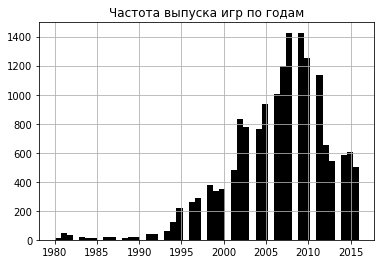

In [19]:
data['year_of_release'].hist(bins=50, color='black')
plt.title('Частота выпуска игр по годам')

Видим, что наиболее активное время выпуска той или иной игры - 2006-2011 года.

In [20]:
platforms = data.pivot_table(index='platform', values = 'world_sales', aggfunc='sum')

In [21]:
platforms.sort_values(by='world_sales', ascending=False).head()

,world_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


Нашли платформы, у которых наибольшие продажи за все время, далее будем строить распределение по годам.

In [22]:
x = ['PS4', 'PS3', 'X360', '3DS','XOne']
plat = data.query('platform in @x')
platforms = plat.pivot_table(index=['platform','year_of_release'],values='world_sales', aggfunc='count')

In [23]:
platforms

world_sales
platform year_of_release             
3DS      2011                     116
         2012                      93
         2013                      91
         2014                      80
         2015                      86
         2016                      46
PS3      2006                      27
         2007                      90
         2008                     138
         2009                     162
         2010                     181
         2011                     215
         2012                     148
         2013                     126
         2014                     108
         2015                      73
         2016                      38
PS4      2013                      16
         2014                      75
         2015                     137
         2016                     164
X360     2005                      18
         2006                      93
         2007                     123
         2008                     146
         2009                     172
         2010                     182
         2011                     206
         2012                     106
         2013                      75
         2014                      63
         2015                      35
         2016                      13
XOne     2013                      19
         2014                      61
         2015                      80
         2016                      87

Видим, что средний срок "жизни" платформ составляет +-10 лет, распределили по годам и посчитали, сколько же было в каждом году продано.

Выделим как **актуальный период** временной промежуток с 2011 по 2016 год, так как они максимально отражают покупательскую способность клиентов к 2017 году, так как мы сделали вывод, что цикл рождения новых платформ - 10 лет, а также отражают заинтересованность людей и динамику заинтересованности в ближайший период.

Создадим новую таблицу, в которой оставим только те строки, в которых год выпуска в диапазоне с 2011 по 2016:

In [24]:
new_data = data[data['year_of_release']>2011]

In [25]:
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Имеем таблицу, в которой почти 3000 строк.

In [26]:
new_pivot = new_data.pivot_table(index='platform', values='world_sales', aggfunc='sum')

In [27]:
new_pivot.sort_values(by='world_sales', ascending=False)

,world_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Видим, что самые большие продажи за это время принесли такие платформы как PS4, PS3, X360, 3DS,XOne.

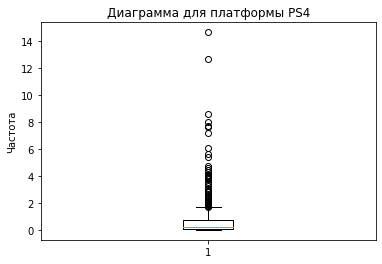

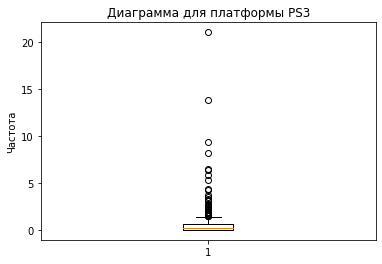

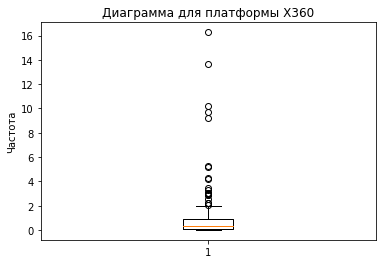

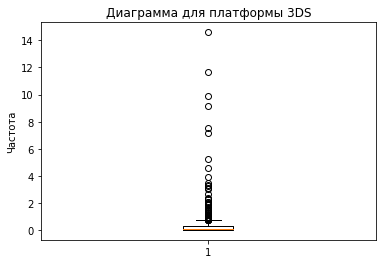

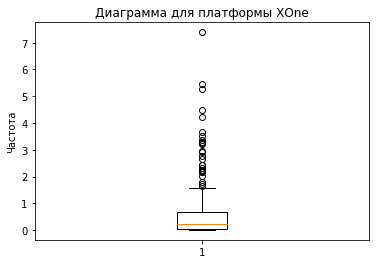

In [28]:
for string in x:
    plt.boxplot(new_data[new_data['platform']==string]['world_sales'])
    plt.ylabel('Частота')
    plt.title('Диаграмма для платформы {}'.format(string))
    plt.show()

Видим, что данная диаграмма отражает факт того, что у разных платформ были разные продажи по всему миру. Самые большие продажи были достигнуты платформой X360.

Text(0.5, 1.0, 'Диаграмма для оценки зависимости продаж от оценки пользователей')

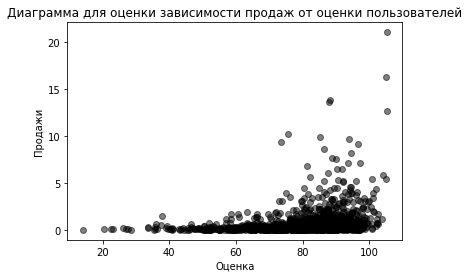

In [29]:
plt.scatter(x=new_data['critic_score']+new_data['user_score'], y=new_data['world_sales'], color='black', alpha=0.5)
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.title('Диаграмма для оценки зависимости продаж от оценки пользователей')

Построили диаграмму рассеяния зависимости продаж от рейтинга критиков и юзеров.

In [30]:
corr=new_data['world_sales'].corr(new_data['critic_score']+new_data['user_score'])

In [31]:
corr

0.2879551001409536

Видим, что корреляция довольно незначительная, что может говорить о том, что прямой зависимости между этими двумя характеристиками нет, или же она не ярко выражена.

In [32]:
corr_full=data['world_sales'].corr(data['critic_score']+data['user_score'])

In [33]:
corr_full

0.23142557690974502

Корреляция у других платформ еще меньше.

In [34]:
genres = data.pivot_table(index='genre', values='world_sales', aggfunc='median')

In [35]:
genres.sort_values(by='world_sales', ascending=False)

,world_sales
genre,
Platform,0.27
Shooter,0.24
Sports,0.22
Fighting,0.21
Action,0.19
Racing,0.19
Role-Playing,0.18
Misc,0.16
Simulation,0.15


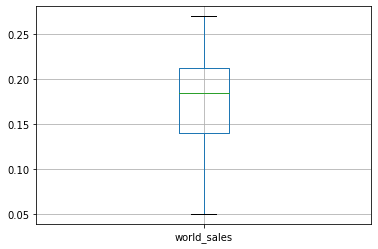

In [36]:
genres.boxplot()

По жанрам идет явное лидирование игр "платформенных" и "шутеров", а наименее активно продаются "приключенческие" и "стратегические"

In [37]:
import seaborn as sns

(0, 1)

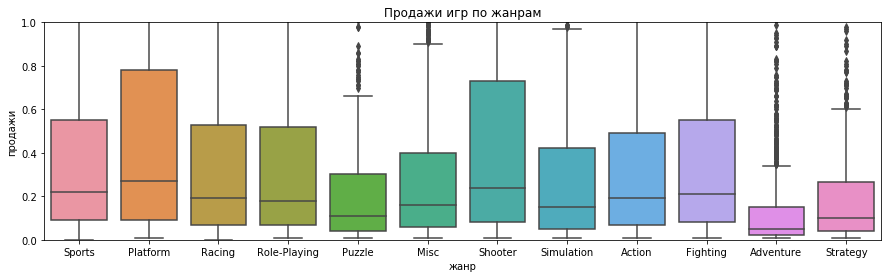

In [38]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=data, x='genre', y='world_sales')
plt.title('Продажи игр по жанрам')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.ylim(0,1)

# Шаг 4. Составьте портрет пользователя каждого региона

In [39]:
jp = new_data[new_data['jp_sales'] >0]

In [40]:
jp

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [41]:
na = new_data[new_data['na_sales'] >0]

In [42]:
eu = new_data[new_data['eu_sales'] >0]

In [43]:
na

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16615,Balloon Pop 2,3DS,2012,Puzzle,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16618,Xblaze: Lost Memories,PSV,2015,Adventure,0.01,0.00,0.00,0.00,NaN,7.0,M,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01


In [44]:
eu

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


Выделили пользователей определенных районов. Найдем самый популярные платформы и жанры.

In [45]:
jp_pivot = jp.a

In [46]:
jp_pivot.sort_values(by='jp_sales', ascending=False)

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01
PSP,10.47
DS,3.72
Wii,3.39
X360,1.57


In [47]:
jp['genre'].value_counts()

Action          563
Role-Playing    299
Adventure       206
Misc            108
Shooter          93
Fighting         80
Sports           78
Simulation       34
Platform         33
Racing           33
Strategy         30
Puzzle           12
Name: genre, dtype: int64

In [48]:
jp_genres =jp['genre'].value_counts()

In [49]:
na_pivot = na.pivot_table(index='platform', values='na_sales', aggfunc='sum')

In [50]:
na_pivot.sort_values(by='na_sales', ascending=False)

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31
WiiU,38.10
PC,19.12
Wii,17.45
PSV,10.98


In [51]:
na['genre'].value_counts()

Action          589
Shooter         212
Role-Playing    195
Sports          182
Misc            104
Adventure        89
Racing           80
Fighting         76
Platform         75
Simulation       38
Strategy         29
Puzzle            8
Name: genre, dtype: int64

In [52]:
na_genres=na['genre'].value_counts()

In [53]:
eu_pivot = eu.pivot_table(index='platform', values='eu_sales', aggfunc='sum')

In [54]:
eu_pivot.sort_values(by='eu_sales', ascending=False)

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64
PC,37.76
WiiU,25.13
Wii,11.92
PSV,11.36


In [87]:
test = (new_data
        .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
        .sort_values(by='eu_sales', ascending=False)
       )

test

,eu_sales,jp_sales,na_sales
platform,,,
PS4,141.09,15.96,108.74
PS3,106.86,35.29,103.38
X360,74.52,1.57,140.05
XOne,51.59,0.34,93.12
3DS,42.64,87.79,55.31
PC,37.76,0.00,19.12
WiiU,25.13,13.01,38.10
Wii,11.92,3.39,17.45
PSV,11.36,21.04,10.98


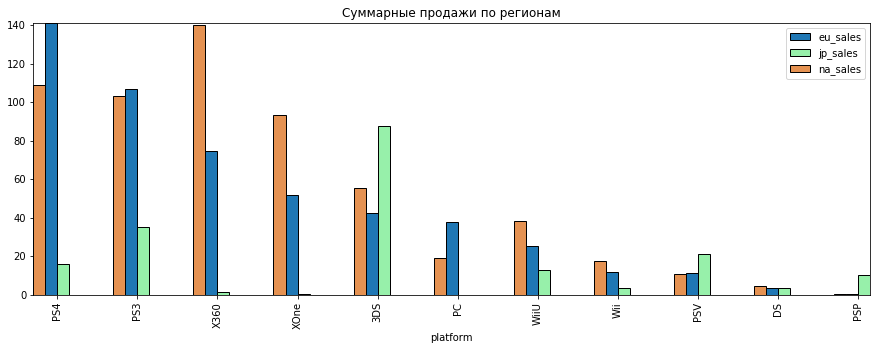

In [109]:
# создаём пустое поле
ax = plt.gca()

# поочереди строим каждый график, задавая ему общее поле для отрисовки (ax) и свою позицию (position)
plot1 = test['eu_sales']
plot1.plot(kind='bar', width=0.15, ec='black', figsize=(15,5), ax=ax, position=1)

plot2 = test['jp_sales']
plot2.plot(kind='bar', color='#97F0AA', width=0.15, ec='black', figsize=(15,5), ax=ax, position=0)

plot3 = test['na_sales']
plot3.plot(kind='bar', color='#E59252', width=0.15, ec='black', figsize=(15,5), ax=ax, position=2)

# легенда и приведение в порядок длины и ширины поля для отрисовки
ax.legend(test.columns)
ax.autoscale(tight=True)

plt.title('Суммарные продажи по регионам')

plt.show()

<hr style="border: 1px solid #000;"> 

In [55]:
eu_genres = eu['genre'].value_counts()
eu_genres

Action          642
Shooter         214
Sports          202
Role-Playing    196
Misc            104
Racing          104
Adventure        97
Platform         72
Fighting         69
Simulation       55
Strategy         41
Puzzle           15
Name: genre, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81570a5150>]],
      dtype=object)

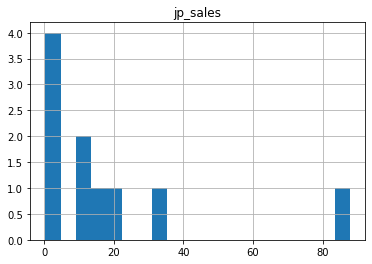

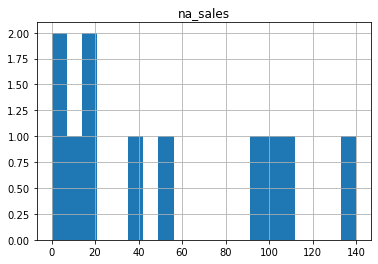

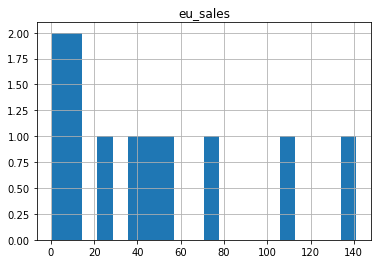

In [56]:
jp_pivot.hist(bins=20)
na_pivot.hist(bins=20)
eu_pivot.hist(bins=20)

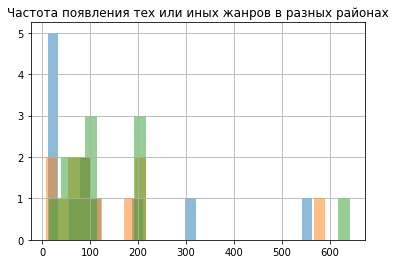

In [57]:
jp_genres.hist(bins=25, alpha=0.5)
na_genres.hist(bins=25, alpha=0.5)
eu_genres.hist(bins=25, alpha=0.5)
plt.title('Частота появления тех или иных жанров в разных районах')
plt.show()

Видим, что в Европе и Америке самыми распространенными платформами являются 3DS, PS3, PSV, в то время как в Японии лидирующие позиции занимают X360, PS4,PS3.	

Также самыми распространенными жанрами в Европе и Америке являются Action, Sports, Misc, Shooter, а в Японии Adventure, Role-Playing, Action, Misc.

# Шаг 5. Проверьте гипотезы

In [58]:
from scipy import stats as st

### Первая гипотеза
- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза : Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [60]:
xone = new_data.query('platform == "XOne"')['user_score'].dropna()

In [61]:
xone

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [62]:
pc = new_data.query('platform == "PC"')['user_score'].dropna()

In [63]:
pc

192      4.0
458      3.9
688      7.9
959      4.8
1095     7.9
        ... 
16463    6.8
16509    7.9
16518    1.4
16584    7.9
16692    7.6
Name: user_score, Length: 206, dtype: float64

In [64]:
alpha = 0.05

In [65]:
results = st.ttest_ind(xone, pc, equal_var=False)
 
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Исходя из выводов, можно сказать, что нельзя утверждать тот факт, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, но и обратное тоже не явялется фактом.

### вторая гипотеза
- Нулевая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются.

In [68]:
action = new_data.query('genre == "Action"')['user_score'].dropna()

In [69]:
action

16       8.2
23       8.1
42       8.3
81       6.6
127      6.9
        ... 
16597    6.0
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 523, dtype: float64

In [70]:
sport = new_data.query('genre == "Sports"')['user_score'].dropna()

In [71]:
sport

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16146    6.9
16230    5.5
16450    4.5
16518    1.4
16643    6.6
Name: user_score, Length: 195, dtype: float64

In [72]:
results = st.ttest_ind(action, sport, equal_var=False)
 
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Исходя из выводов, можно сказать, что можно утверждать, что средние пользовательские рейтинги жанров Экшн и Спорт разные.

# Шаг 6. Напишите общий вывод

Согласно данным, можно сделать вывод: 

- усилие сделать необходимо на Европу и Америку, так как они приносят наибольшее количество продаж;
- продавать необходимо то, что инетересно данному сегменту: Экшн на PS4/Xbox360